In [63]:
import bs4
import urllib.request
from urllib.request import urlopen 
from bs4 import BeautifulSoup as soup

In [64]:
html = urlopen('https://en.wikipedia.org/wiki/List_of_largest_recorded_music_markets')
bsobj = soup(html.read())
tbody = bsobj('table',{'class':'wikitable plainrowheaders sortable'})[4].findAll('tr')
xl = []
for row in tbody:
    cols = row.findChildren(recursive = False)
    cols = tuple(element.text.strip().replace('%','') for element in cols)
    xl.append(cols)
xl = xl[1:-1]
xl
 

[('1', 'United States', '5,916.1', '15', '75', '7', '3'),
 ('2', 'Japan', '2,727.5', '72', '21', '5', '1'),
 ('3', 'Germany', '1,323.1', '43', '36', '20', '1'),
 ('4', 'United Kingdom', '1,310.7', '30', '50', '18', '2'),
 ('5', 'France', '925.1', '36', '34', '27', '3'),
 ('6', 'South Korea', '494.4', '37', '59', '4', '0'),
 ('7', 'Canada', '437.2', '21', '65', '14', '1'),
 ('8', 'Australia', '412.9', '19', '68', '11', '2'),
 ('9', 'Brazil', '295.8', '5', '60', '34', '0'),
 ('10', 'China', '292.3', '3', '90', '7', '0'),
 ('11', 'Netherlands', '269.5', '22', '50', '27', '0'),
 ('12', 'Italy', '247.9', '39', '36', '22', '3'),
 ('13', 'Spain', '205.8', '26', '49', '24', '2'),
 ('14', 'Sweden', '199.5', '10', '72', '17', '1'),
 ('15', 'Norway', '139.0', '9', '71', '19', '1'),
 ('16', 'Denmark', '137.9', '7', '56', '36', '1'),
 ('17', 'Switzerland', '137.8', '27', '52', '21', '0'),
 ('18', 'Mexico', '137.0', '15', '79', '4', '1'),
 ('19', 'India', '130.7', '7', '78', '9', '6'),
 ('20', 'Arge

In [65]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [66]:
scrap_db = pymysql.connect(host='localhost',user='root',password='Mari@123',database='new_db',cursorclass=pymysql.cursors.DictCursor)

In [67]:
cursor = scrap_db.cursor()

# Drop table if it already exist using execute() method.
cursor.execute("DROP TABLE IF EXISTS WIKI2 ")

# Create table as per requirement
sql = """CREATE TABLE WIKI (
   RANKING  INT,
   MARKET  CHAR(50),
   RETAIL_VALUE  CHAR(20),  
   PHYSICAL  INT,
   DIGITAL  INT,
   PERFORMANCE_RIGHTS  INT,
   SYNCHRONIZATION  INT
   )"""

cursor.execute(sql)

# disconnect from server
scrap_db.close()

OperationalError: (1050, "Table 'wiki' already exists")

In [147]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
scrap_db = pymysql.connect(host='localhost',user='root',password='Mari@123',database='new_db',cursorclass=pymysql.cursors.DictCursor)
mySql_insert_query = """INSERT INTO WIKI (RANKING, MARKET, RETAIL_VALUE, PHYSICAL,DIGITAL,PERFORMANCE_RIGHTS,SYNCHRONIZATION) 
                                VALUES (%s, %s, %s, %s ,%s, %s, %s) """

records_to_insert = xl

cursor = scrap_db.cursor()
cursor.executemany(mySql_insert_query, records_to_insert)
scrap_db.commit()
print(cursor.rowcount, "Record inserted successfully into WIKI2 table")



20 Record inserted successfully into WIKI2 table


In [153]:
import pandas as pd
import matplotlib.pyplot as plt
csv_file='wiki2.csv'
data = pd.read_csv(csv_file)

In [168]:
x=data["MARKET"]
y=data["RETAIL_VALUE"]
z=data["RANKING"]


In [169]:
a=list(x)
b=list(y)
c=list(z)

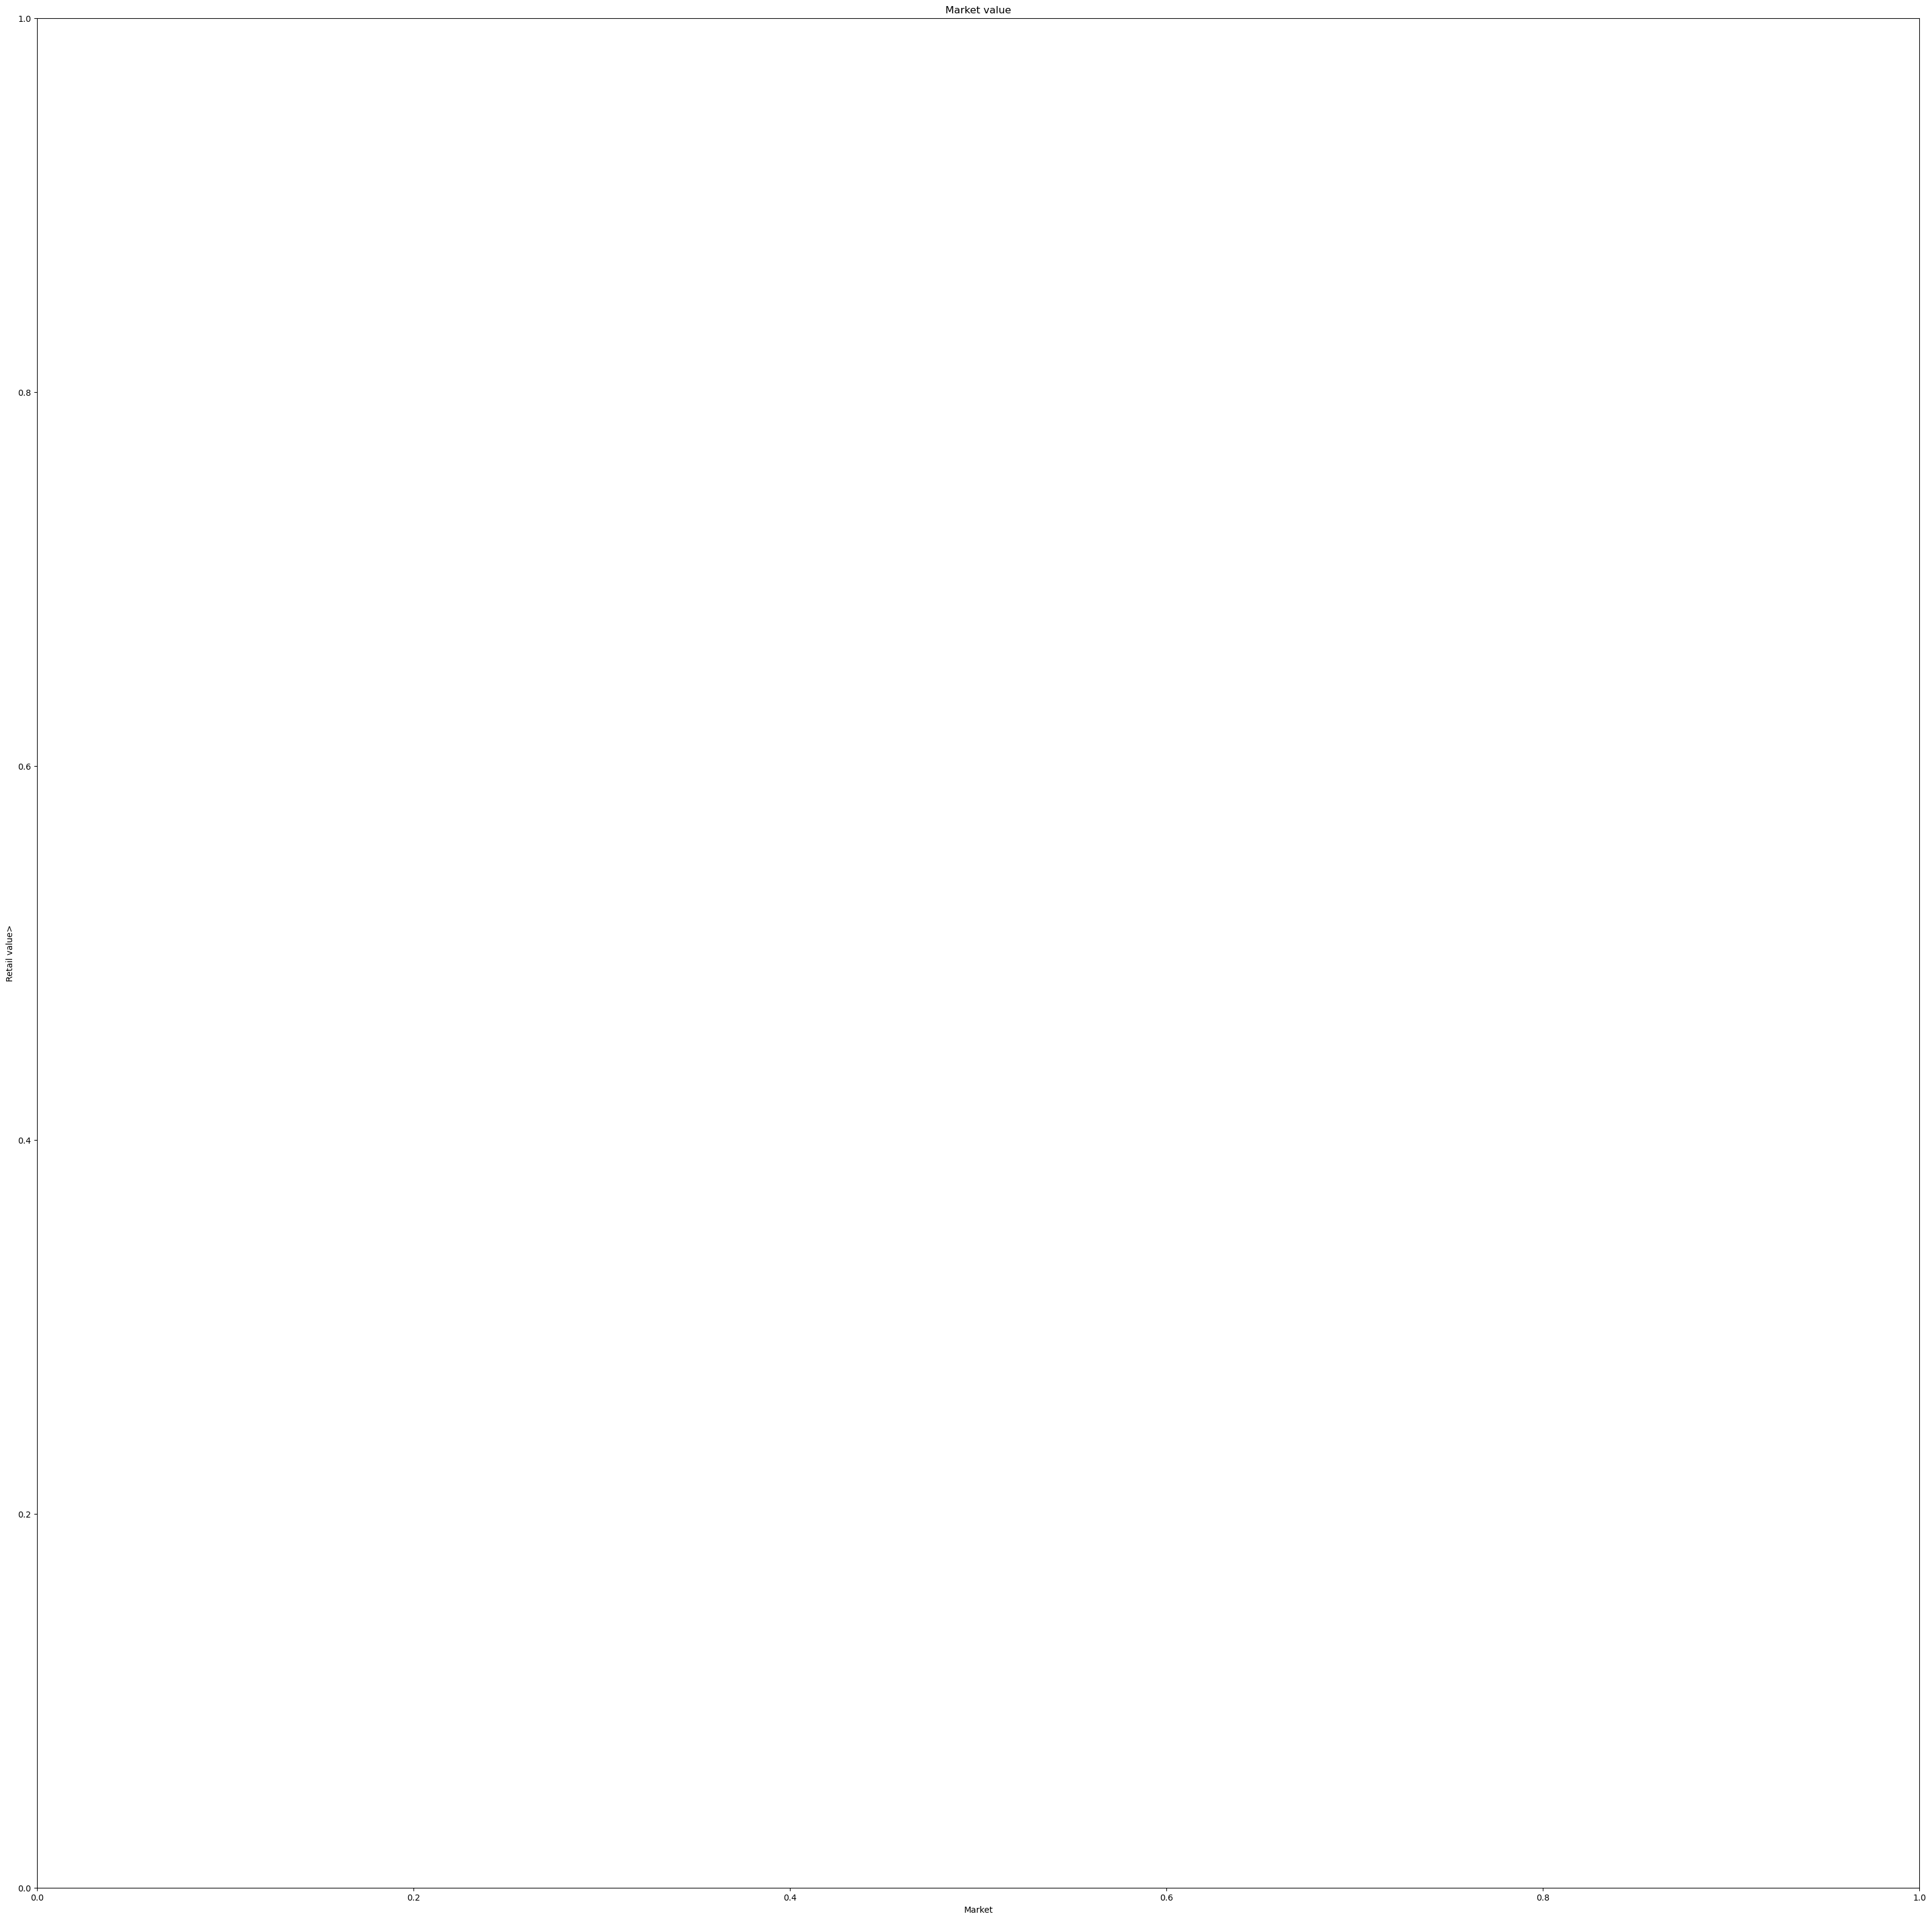

In [175]:
plt.scatter(a,b)
fig = plt.figure(figsize=(40, 40))
plt.xlabel('Market')
plt.ylabel('Retail value>')
plt.title('Market value')
plt.show()

<BarContainer object of 20 artists>

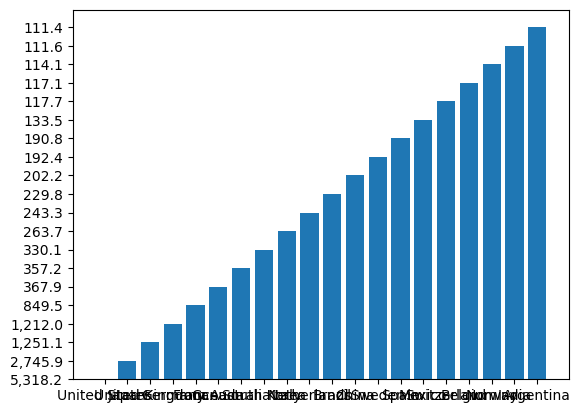

In [176]:
plt.bar(a,b)

([<matplotlib.patches.Wedge at 0x1d34a3e8c10>,
 [Text(1.099876911981901, 0.016455348345077815, '5,318.2'),
  Text(1.098031142594195, 0.06578457184847146, '2,745.9'),
  Text(1.0900447374016187, 0.1476565964088171, '1,251.1'),
  Text(1.0686390405016364, 0.2607884221274834, '1,212.0'),
  Text(1.0239611195332305, 0.40187513693217336, '849.5'),
  Text(0.9442936663119885, 0.5641892162768296, '367.9'),
  Text(0.8174592949603051, 0.7360436815047061, '357.2'),
  Text(0.6331787472650127, 0.8994913418215371, '330.1'),
  Text(0.3865122693841102, 1.0298583716295873, '263.7'),
  Text(0.08220305633205575, 1.0969241803924594, '243.3'),
  Text(-0.2607884659007615, 1.0686390298192967, '229.8'),
  Text(-0.6059867255664043, 0.9180305487494997, '202.2'),
  Text(-0.899491356642155, 0.6331787262108983, '192.4'),
  Text(-1.0759623750377125, 0.22870279295016335, '190.8'),
  Text(-1.0724206830404326, -0.24477311655304887, '133.5'),
  Text(-0.8496585836435696, -0.6986274337877116, '117.7'),
  Text(-0.41714788704

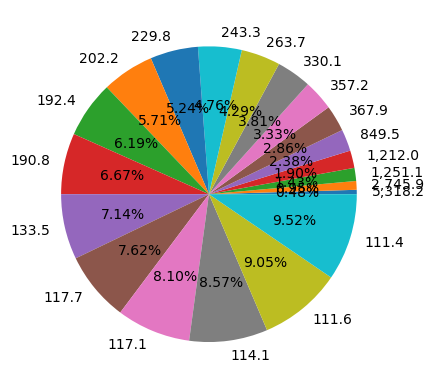

In [177]:
plt.pie(z,labels=y,autopct='%.2f%%')

In [178]:
pip install widgetsnbextension

Note: you may need to restart the kernel to use updated packages.


In [179]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [180]:
pip install voila


     ---------------------------------------- 5.5/5.5 MB 29.2 MB/s eta 0:00:00
     ---------------------------------------- 101.4/101.4 kB ? eta 0:00:00
     ------------------------------------- 273.2/273.2 kB 16.4 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.4.4
    Uninstalling nbconvert-6.4.4:
      Successfully uninstalled nbconvert-6.4.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [1]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix\n
!jupyter serverextension enable voila --sys-prefix

usage: jupyter-nbextension [-h] [--debug] [--show-config] [--show-config-json]
                           [--user] [--system] [--sys-prefix] [--py]
                           [--python] [--section EnableNBExtensionApp.section]
                           [extra_args ...]
jupyter-nbextension: error: unrecognized arguments: --sys-prefix\n
Enabling: voila
- Writing config: C:\Users\ROG STRIX\anaconda3\etc\jupyter
    - Validating...
      voila 0.4.0 ok
